# Lesson 12 - ANOVA Model Checking

## Exercise 13.2.12

An article in Scientia Iranica [“Tuning the Parameters of an Artificial Neural Network (ANN) Using Central Composite Design and Genetic Algorithm” (2011, Vol. 18(6), pp. 1600–1608)] described a series of experiments to tune parameters in artificial neural networks. One experiment considered the relationship between model fitness [measured by the square root of mean square error (RMSE) on a separate test set of data] and model complexity that were controlled by the number of nodes in the two hidden layers. The following data table (extracted from a much larger data set) contains three different ANNs: ANN1 has 33 nodes in layer 1 and 30 nodes in layer 2, ANN2 has 49 nodes in layer 1 and 45 nodes in layer 2, and ANN3 has 17 nodes in layer 1 and 15 nodes in layer 2.   

Therefore, the response variable is the ratio:

$$ y_{ij} = \frac{Model Fitness}{Model Complexity} = \frac{RMSE}{Total Nodes}  $$

Assume $\alpha = 0.05$ for all questions.

In [3]:
library(dplyr)
library(ggplot2)

network <- c('NN1', 'NN2', 'NN3')
replicates <- as.character(1:8)
response <- c(0.0121,	0.0031,	0.1562,
              0.0132,	0.0006,	0.2227,
              0.0011,	0,	0.0953,
              0.0023,	0,	0.8911,
              0.0391,	0.022,	1.3892,
              0.0054,	0.0019,	0.0154,
              0.0003,	0.0007,	1.7916,
              0.0014,	0,	0.1992)
mx <- matrix(data = response, nrow = 8, ncol = 3, byrow = TRUE, dimnames = list(replicates, network))

mx

,NN1,NN2,NN3
1,0.0121,0.0031,0.1562
2,0.0132,0.0006,0.2227
3,0.0011,0.0000,0.0953
4,0.0023,0.0000,0.8911
5,0.0391,0.0220,1.3892
6,0.0054,0.0019,0.0154
7,0.0003,0.0007,1.7916
8,0.0014,0.0000,0.1992


## a. Construct a box plot to visually compare the different ANNs. 


In [11]:
network <- rep(c('NN1','NN2','NN3'), 8)

df <- data.frame(network = as.factor(network), response)

head(df)

,network,response
,<fct>,<dbl>
1,NN1,0.0121
2,NN2,0.0031
3,NN3,0.1562
4,NN1,0.0132
5,NN2,0.0006
6,NN3,0.2227


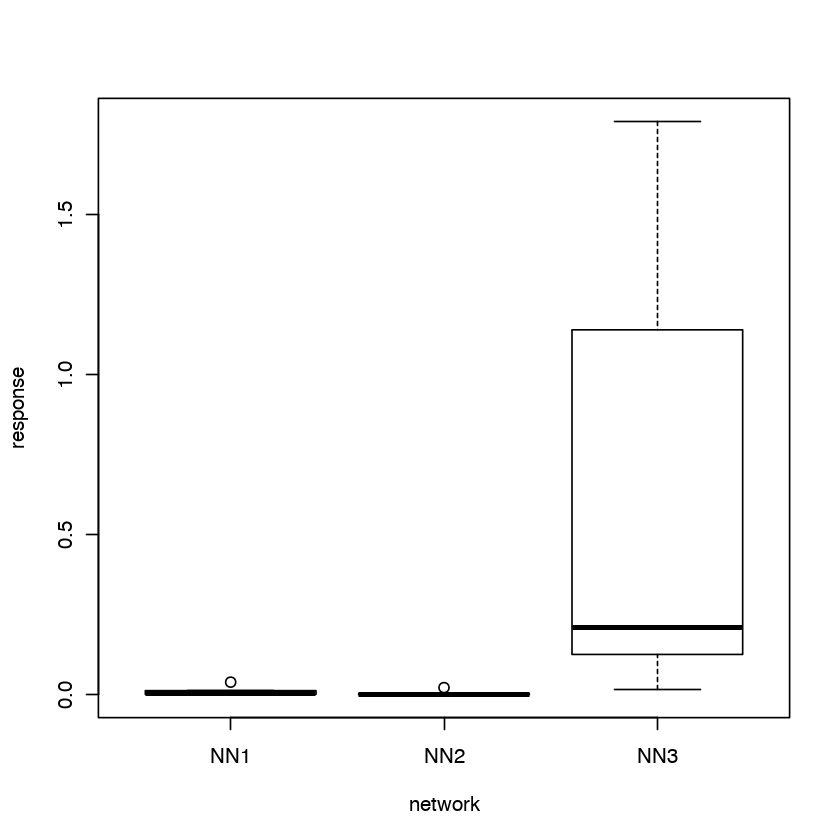

In [14]:
boxplot(response ~ network, df)

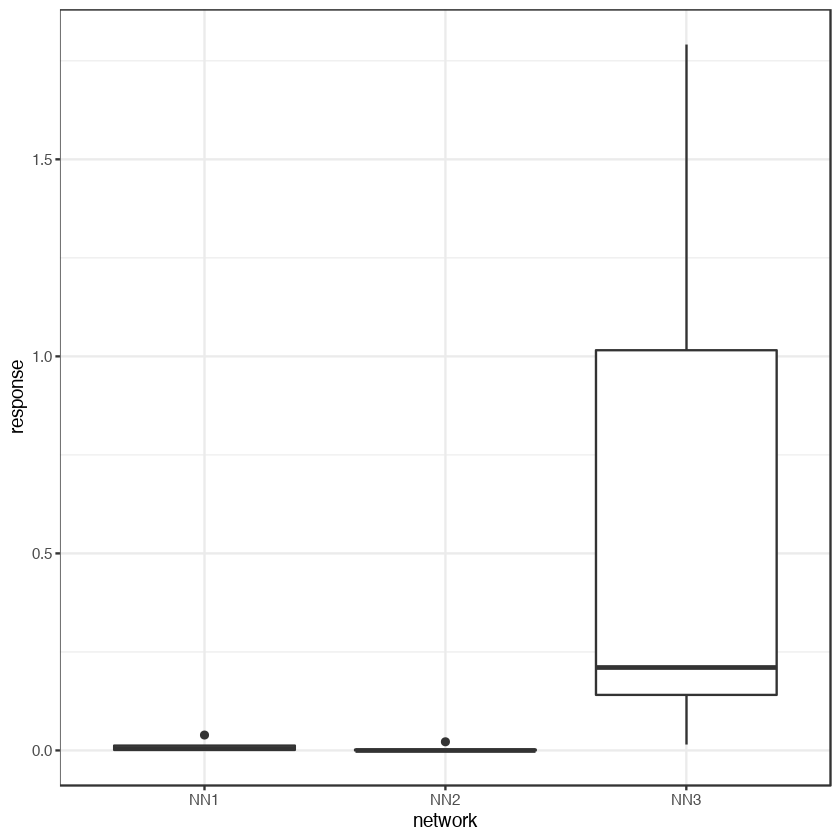

In [26]:
ggplot(data = df, aes(x = network, y = response)) + geom_boxplot() + theme_bw()

## b. State the null and alternative hypotheses for this ANOVA.  


$H_{0}: \tau_1 = \tau_2 = \tau_3 = 0$

or... There are no treatment effects -> all of the neural networks perform the same

$H_a: \tau_i \neq 0$ for some value of $i$

or... There is at least one treatment effect -> at least one of the networks performs better than the others.

## c. Conduct ANOVA using R and ensure to include the output summary of the ANOVA results. 

In [20]:
mod <- aov(response ~ network, df)
summary(mod)

            Df Sum Sq Mean Sq F value Pr(>F)   
network      2  1.848  0.9241   6.017 0.0086 **
Residuals   21  3.225  0.1536                  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

## d. State the first assumption of ANOVA and state how you might check that it is met.

Observations are independent...based on the prompt, this we assume this to be true.

## e. State the second assumption of ANOVA and check that it is met.  

Residuals NID

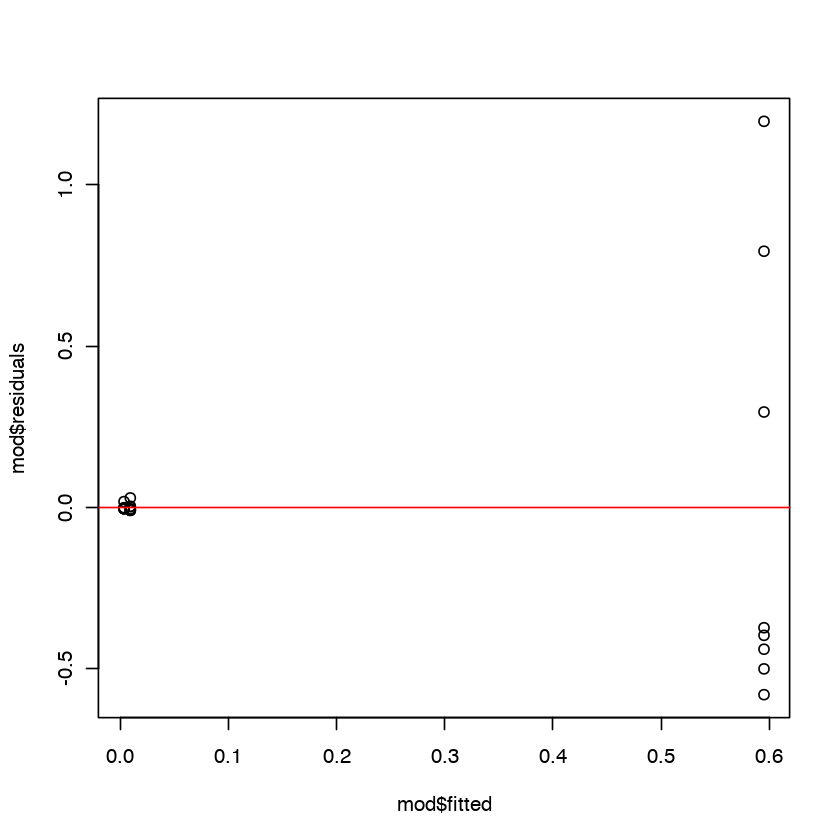

In [22]:
plot(mod$fitted, mod$residuals)
abline(0,0,col = 'red')

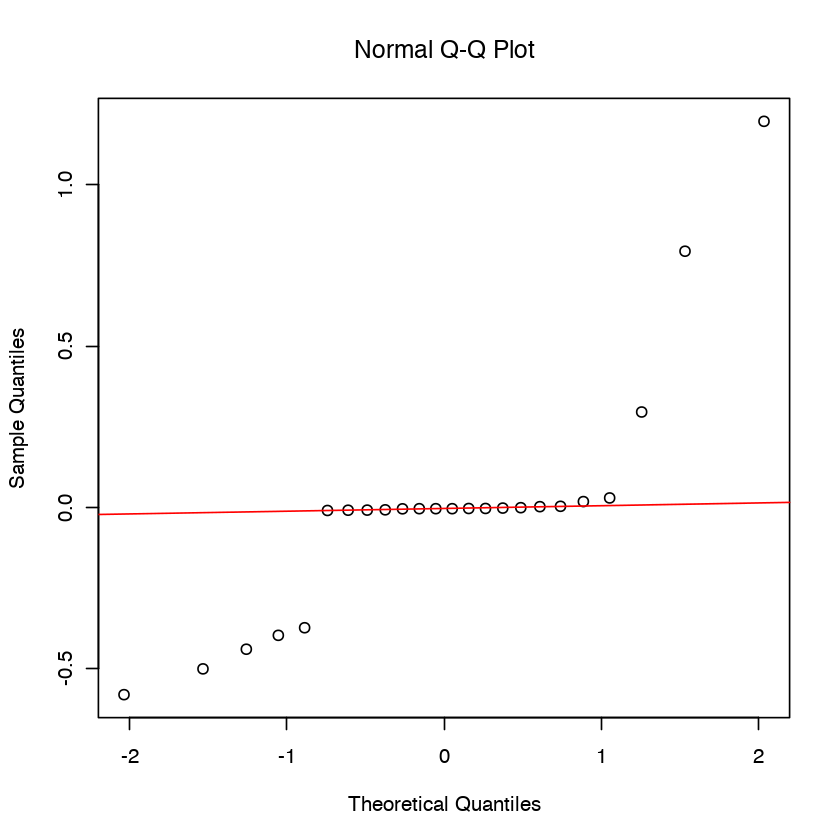

In [23]:
qqnorm(mod$residuals)
qqline(mod$residuals, col = 'red')

In [24]:
shapiro.test(mod$residuals)


	Shapiro-Wilk normality test

data:  mod$residuals
W = 0.74843, p-value = 4.725e-05


## f. State the third assumption of ANOVA and check that it is met with the appropriate hypothesis test.   

All groups have equal variance (homoscedasticity).

In [25]:
bartlett.test(response ~ network, df)


	Bartlett test of homogeneity of variances

data:  response by network
Bartlett's K-squared = 89.603, df = 2, p-value < 2.2e-16


## g. Interpret the results of the ANOVA.  Ensure you do the following:

- State the rejection criteria you used to reach a conclusion.

- State the decision you made regarding the null hypothesis.

- State the correct interpretation of the conclusion in the context of the problem.

Reject if p value on coefficient network is less than alpha = .05.

It was lower, so we reject null.

At least one of the network approaches is better than the others.

## h. Use Tukey's multiple comparison procedure to determine which network, if any, is the best.   

In [28]:
TukeyHSD(mod)

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = response ~ network, data = df)

$network
             diff         lwr       upr     p adj
NN2-NN1 -0.005825 -0.49973174 0.4880817 0.9995129
NN3-NN1  0.585725  0.09181826 1.0796317 0.0183874
NN3-NN2  0.591550  0.09764326 1.0854567 0.0172183


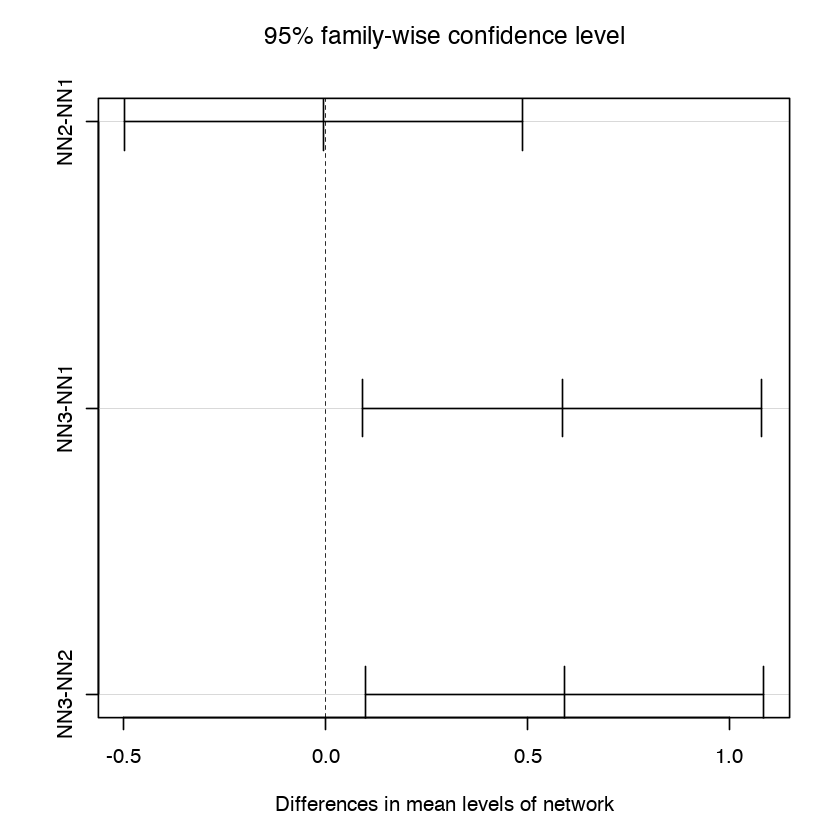

In [29]:
plot(TukeyHSD(mod))